In [ ]:
#Distribution of the release years of high-rated film
#How is the distribution of high-rated movies in different years?
#In which years are the movies released more likely to obtain higher ratings?

In [3]:
#First, loading the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import requests
url = "https://raw.githubusercontent.com/hkusda7005group10/groupdata/refs/heads/main/7005groupdata.csv"
df = pd.read_csv(url)
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [5]:
print(df.head())

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [7]:
print(df.describe())

             index  release_year      runtime   imdb_score    imdb_votes
count  5283.000000   5283.000000  5283.000000  5283.000000  5.267000e+03
mean   2641.000000   2015.879992    79.199886     6.533447  2.340719e+04
std    1525.215067      7.346098    38.915974     1.160932  8.713432e+04
min       0.000000   1953.000000     0.000000     1.500000  5.000000e+00
25%    1320.500000   2015.000000    45.000000     5.800000  5.210000e+02
50%    2641.000000   2018.000000    87.000000     6.600000  2.279000e+03
75%    3961.500000   2020.000000   106.000000     7.400000  1.014400e+04
max    5282.000000   2022.000000   235.000000     9.600000  2.268288e+06


In [13]:
#Clear data, only the data whose type column is MOVIE is retained through conditional filtering
df_movies = df_movies[['index', 'title', 'type','release_year', 'imdb_score', 'imdb_votes']]
df_movies

,index,title,type,release_year,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,1976,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0
2,2,Life of Brian,MOVIE,1979,8.0,392419.0
3,3,The Exorcist,MOVIE,1973,8.1,391942.0
5,5,Dirty Harry,MOVIE,1971,7.7,153463.0
...,...,...,...,...,...,...
5277,5277,Time to Dance,MOVIE,2021,2.2,950.0
5278,5278,Momshies! Your Soul is Mine,MOVIE,2021,5.8,26.0
5279,5279,Fine Wine,MOVIE,2021,6.9,39.0
5280,5280,Clash,MOVIE,2021,6.5,32.0


In [15]:
#check missing_values
missing_values_count = df_movies.isnull().sum()
print(missing_values_count)

index            0
title            0
type             0
release_year     0
imdb_score       0
imdb_votes      16
dtype: int64


In [17]:
#Delete the row where the missing value resides
df_movies = df_movies.dropna(subset=['imdb_votes'])
df_movies

,index,title,type,release_year,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,1976,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0
2,2,Life of Brian,MOVIE,1979,8.0,392419.0
3,3,The Exorcist,MOVIE,1973,8.1,391942.0
5,5,Dirty Harry,MOVIE,1971,7.7,153463.0
...,...,...,...,...,...,...
5277,5277,Time to Dance,MOVIE,2021,2.2,950.0
5278,5278,Momshies! Your Soul is Mine,MOVIE,2021,5.8,26.0
5279,5279,Fine Wine,MOVIE,2021,6.9,39.0
5280,5280,Clash,MOVIE,2021,6.5,32.0


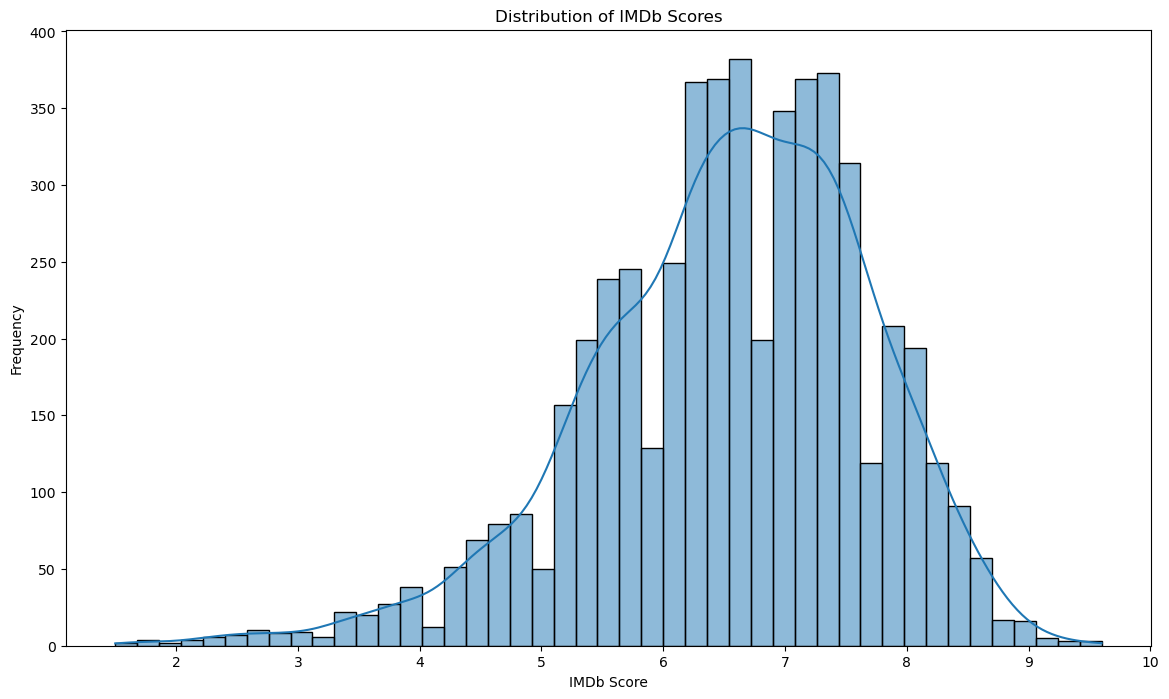

In [19]:
#Visualizing distribution of IMDb scores
plt.figure(figsize=(14, 8))  

sns.histplot(df['imdb_score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show()

In [23]:
#Some statistics of the imdb_score_stats column, such as mean, median, standard difference, etc
imdb_score_stats = df_movies['imdb_score'].describe()
print("statistics of the imdb_score_stats column:")
print(imdb_score_stats)

statistics of the imdb_score_stats column:
count    3391.000000
mean        6.265438
std         1.117526
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.000000
Name: imdb_score, dtype: float64


the number of films released:
release_year
1953      1
1954      2
1956      1
1958      1
1959      1
       ... 
2018    447
2019    466
2020    404
2021    406
2022     88
Name: count, Length: 66, dtype: int64


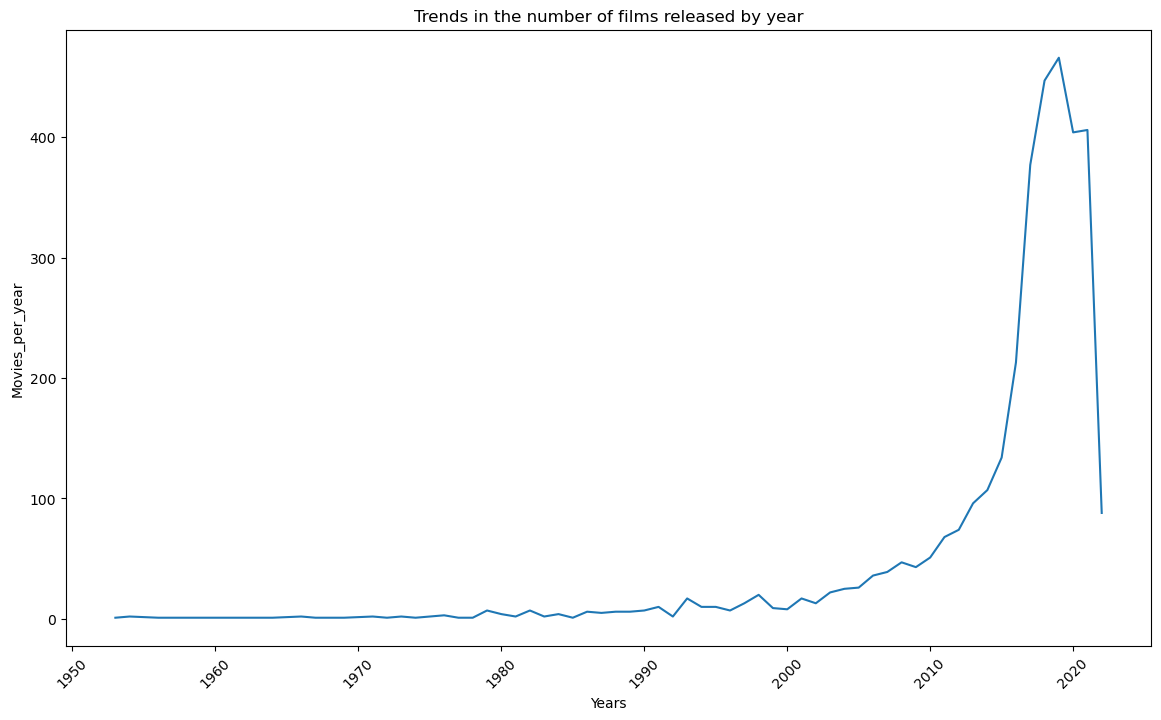

In [37]:
#Check the number of films released in different years
movies_per_year = df_movies['release_year'].value_counts().sort_index()
print("the number of films released:")
print(movies_per_year)

#Draw a line chart
plt.figure(figsize=(14, 8))
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Trends in the number of films released by year')
plt.xlabel('Years')
plt.ylabel('Movies_per_year')
plt.xticks(rotation = 45)

save_path =save_path = 'D:/desktop/HKU/movies_per_year_plot.png'
plt.savefig(save_path)
plt.show()

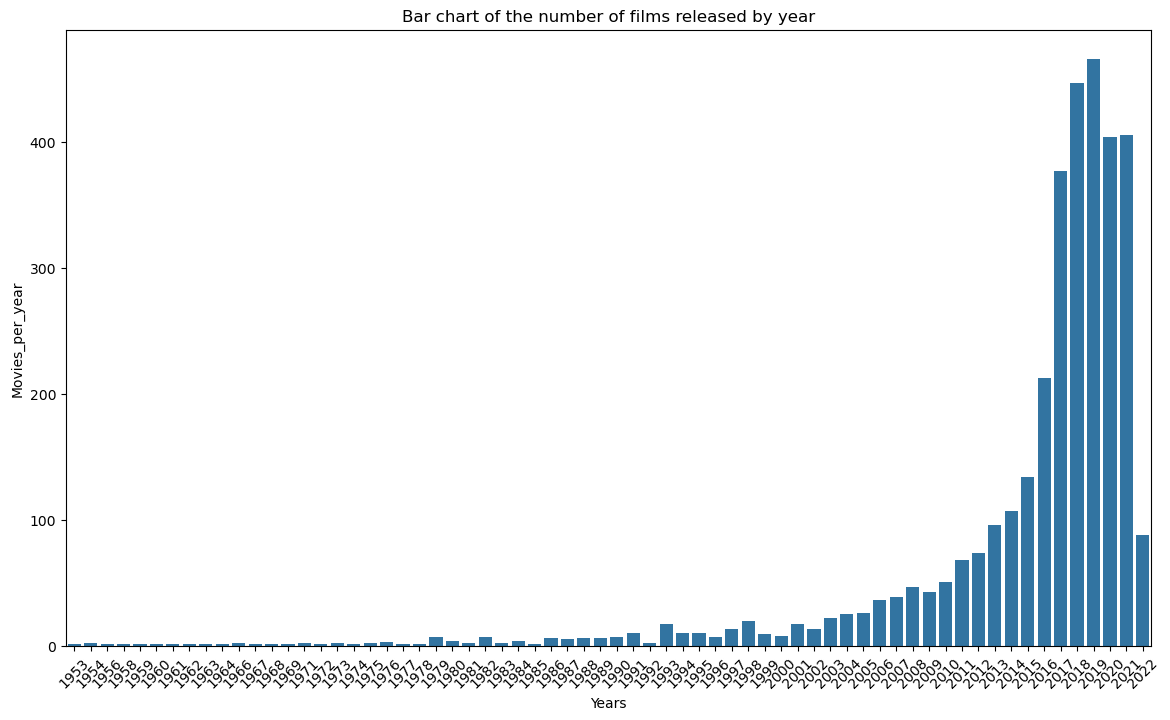

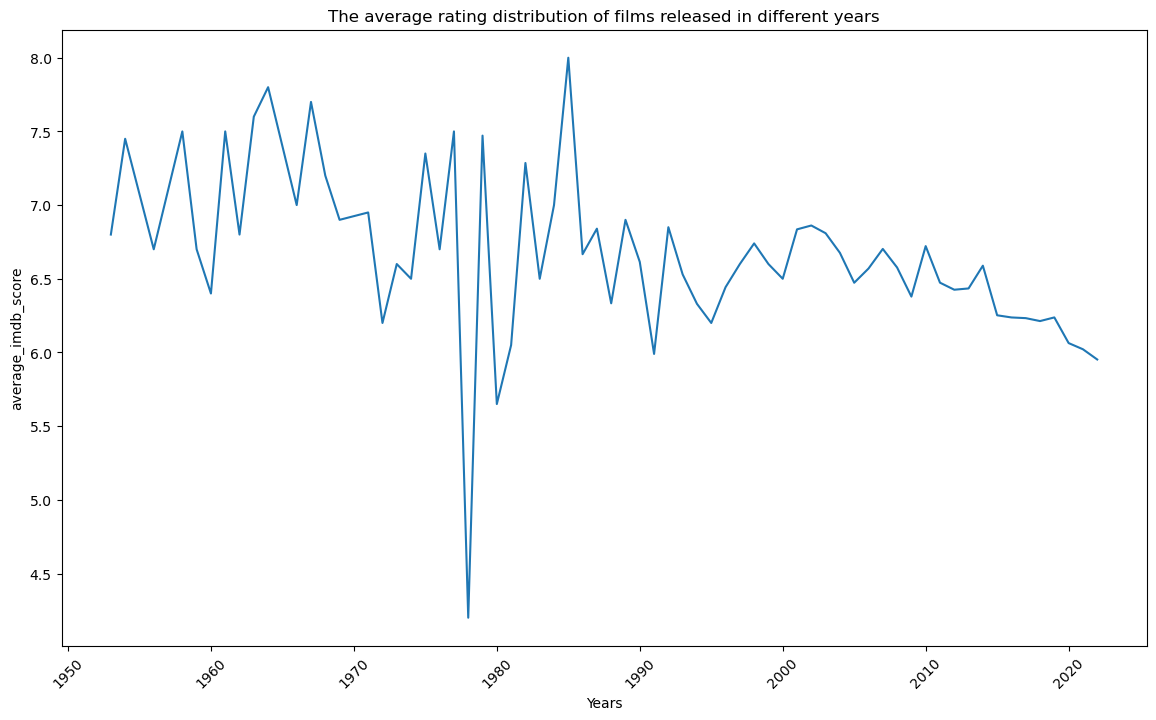

In [123]:
#Bar chart of the number of films released by year
plt.figure(figsize=(14, 8))
sns.countplot(data=df_movies, x='release_year')
plt.title('Bar chart of the number of films released by year')
plt.xlabel('Years')
plt.ylabel('Movies_per_year')
plt.xticks(rotation=45)
save_path_countplot = 'D:/desktop/HKU/movies_per_year_countplot.png'
plt.savefig(save_path_countplot)
plt.show()


#The average imdb score distribution of films released in different years
average_scores_per_year = df_movies.groupby('release_year')['imdb_score'].mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_scores_per_year.reset_index(), x='release_year', y='imdb_score')
plt.title('The average rating distribution of films released in different years')
plt.xlabel('Years')
plt.ylabel('average_imdb_score')
plt.xticks(rotation=45)
save_path_average_score = 'D:/desktop/HKU/movies_per_year_average_score_plot.png'
plt.savefig(save_path_average_score)
plt.show()

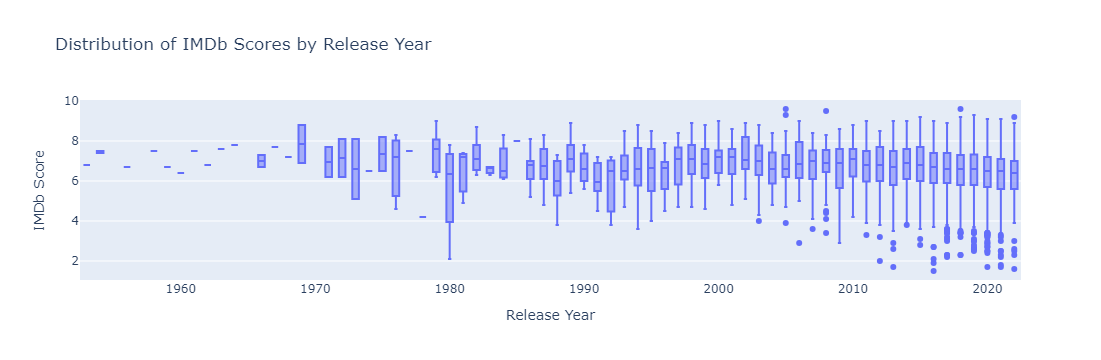

In [133]:
#Box Plot
import plotly.express as px
fig = px.box(df, x='release_year', y='imdb_score', title='Distribution of IMDb Scores by Release Year')
fig.update_layout(xaxis_title='Release Year', yaxis_title='IMDb Score')
fig.show()

Regression equation:y = -0.02x + 48.50


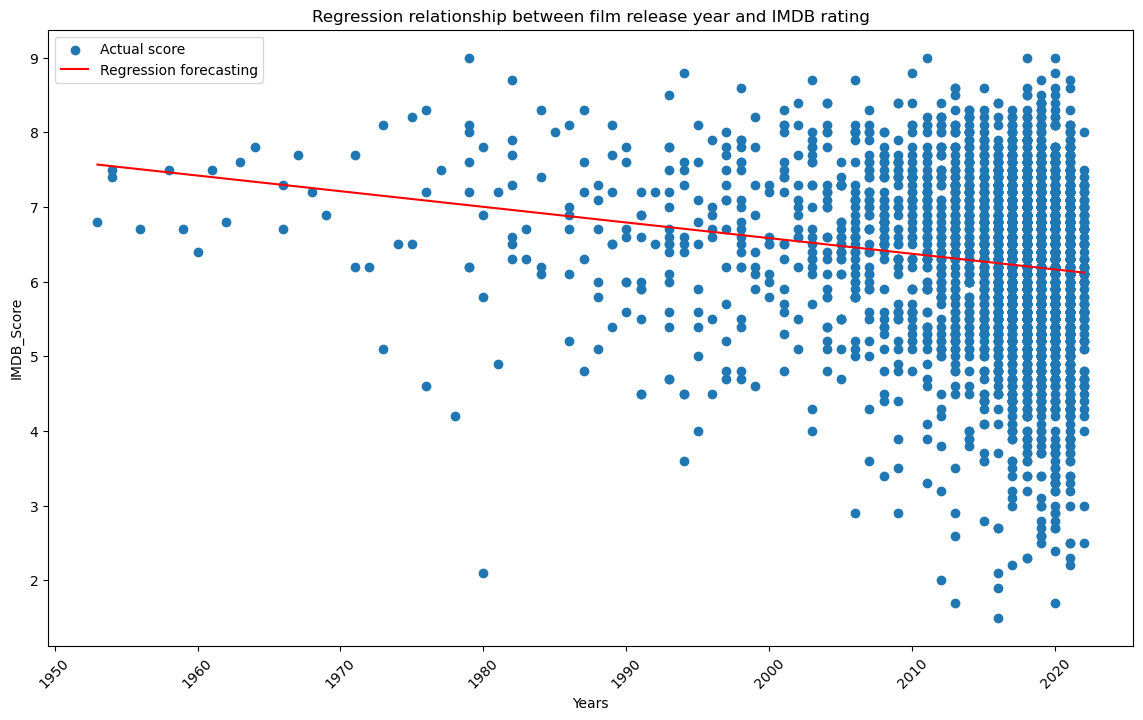

In [53]:
#A regression analysis was performed to explore which years of release were more likely to receive higher ratings
from sklearn.linear_model import LinearRegression
import numpy as np
X = df_movies['release_year'].values.reshape(-1, 1)
y = df_movies['imdb_score'].values

model = LinearRegression()
model.fit(X, y)

coef = model.coef_
intercept = model.intercept_

print(f"Regression equation:y = {coef[0]:.2f}x + {intercept:.2f}")

all_years = np.arange(df_movies['release_year'].min(), df_movies['release_year'].max() + 1).reshape(-1, 1)
predicted_scores = model.predict(all_years)

plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Actual score')
plt.plot(all_years, predicted_scores, color='red', label='Regression forecasting')
plt.title('Regression relationship between film release year and IMDB rating')
plt.xlabel('Years')
plt.ylabel('IMDB_Score')
plt.xticks(rotation=45)
plt.legend()
save_path_average_score = 'D:/desktop/HKU/Regression relationship between film release year and IMDB rating.png'
plt.savefig(save_path_average_score)
plt.show()

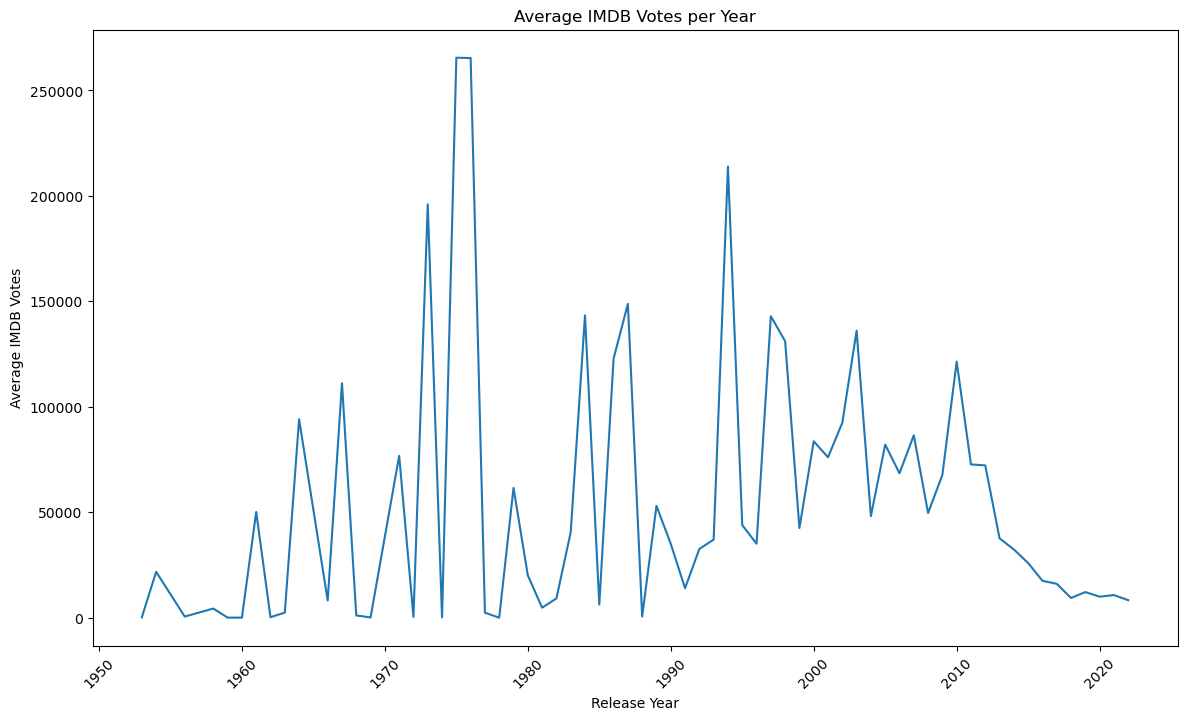

In [97]:
#explore the number of votes for films in different years
votes_per_year_mean = df_movies.groupby('release_year')['imdb_votes'].mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data = votes_per_year_mean.reset_index(), x='release_year', y='imdb_votes')
plt.title('Average IMDB Votes per Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Votes')
plt.xticks(rotation = 45)
save_path_average_score = 'D:/desktop/HKU/Average IMDB Votes per Year.png'
plt.savefig(save_path_average_score)
plt.show()

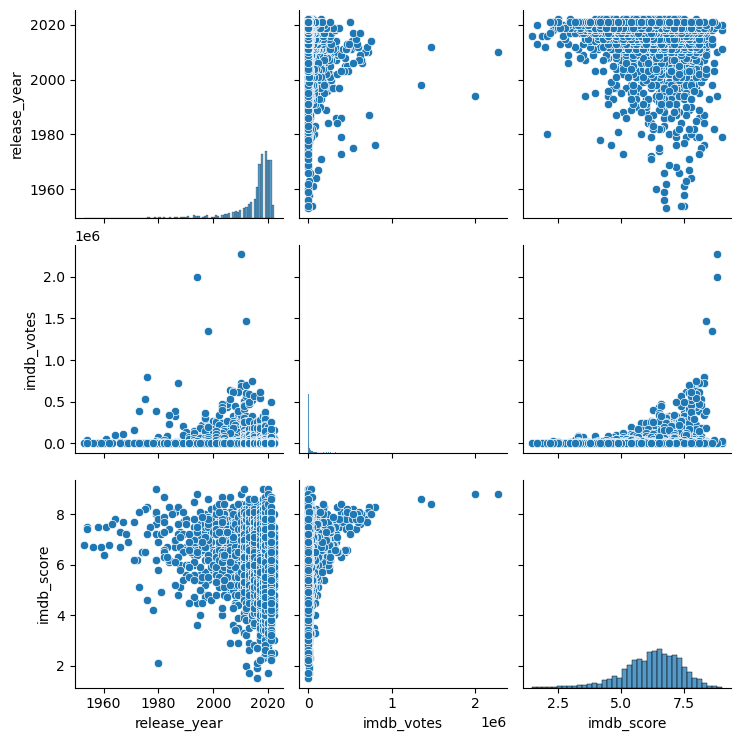

In [99]:
import seaborn as sns
sns.pairplot(df_movies[['release_year', 'imdb_votes', 'imdb_score']])
save_path_average_score = 'D:/desktop/HKU/pairplotr.png'
plt.savefig(save_path_average_score)
plt.show()

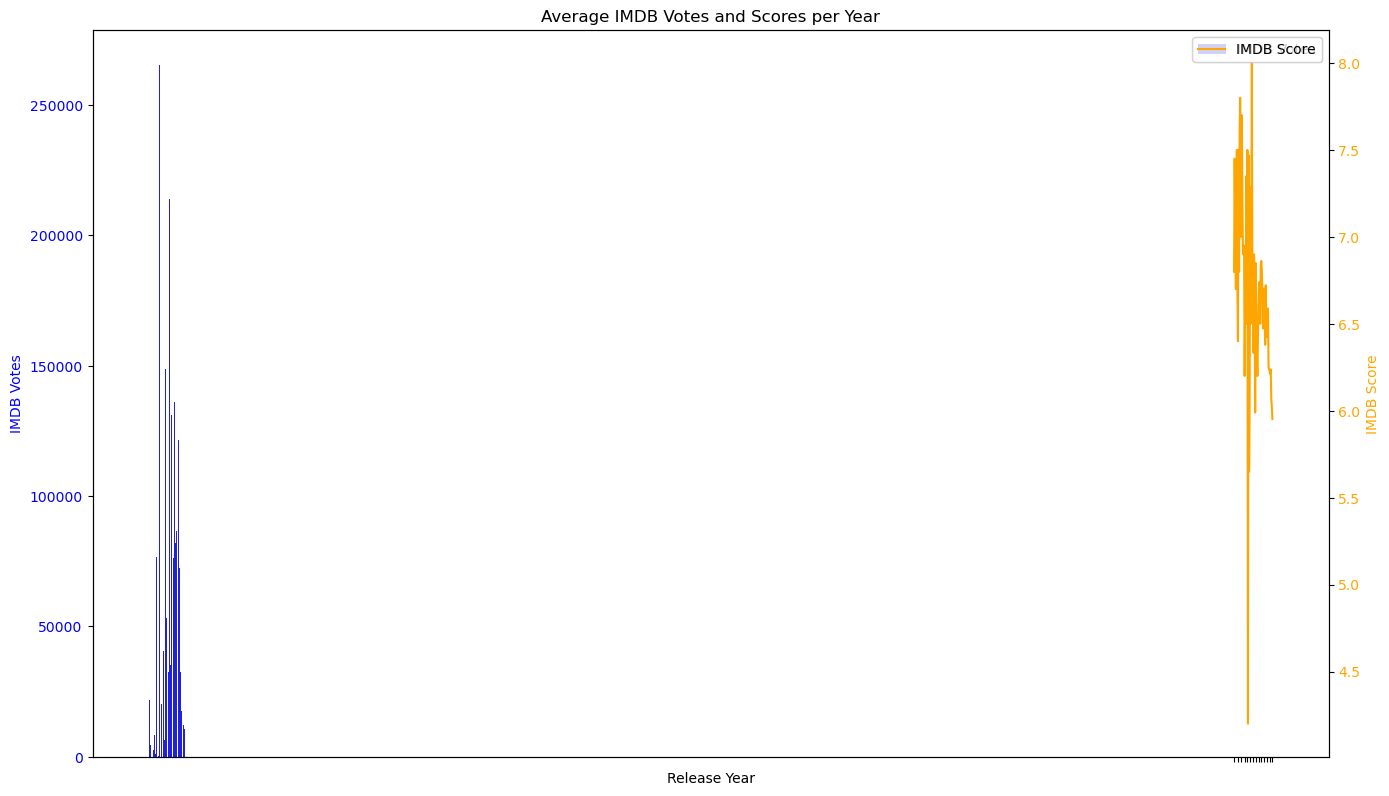

In [101]:
stats_per_year = df_movies.groupby('release_year')[['imdb_votes', 'imdb_score']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(data = stats_per_year, x='release_year', y='imdb_votes', label='IMDB Votes', ax=ax1, color='blue')

ax1.set_xlabel('Release Year')
ax1.set_ylabel('IMDB Votes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

sns.lineplot(data = stats_per_year, x='release_year', y='imdb_score', label='IMDB Score', ax=ax2, color='orange')

ax2.set_ylabel('IMDB Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Average IMDB Votes and Scores per Year')
years = stats_per_year['release_year']
plt.xticks(years[::5], rotation=90)
save_path_average_score = 'D:/desktop/HKU/Average IMDB Votes and Scores per Year.png'
plt.savefig(save_path_average_score)
plt.show()

C:\Users\13958\AppData\Local\Temp\ipykernel_19660\419047944.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



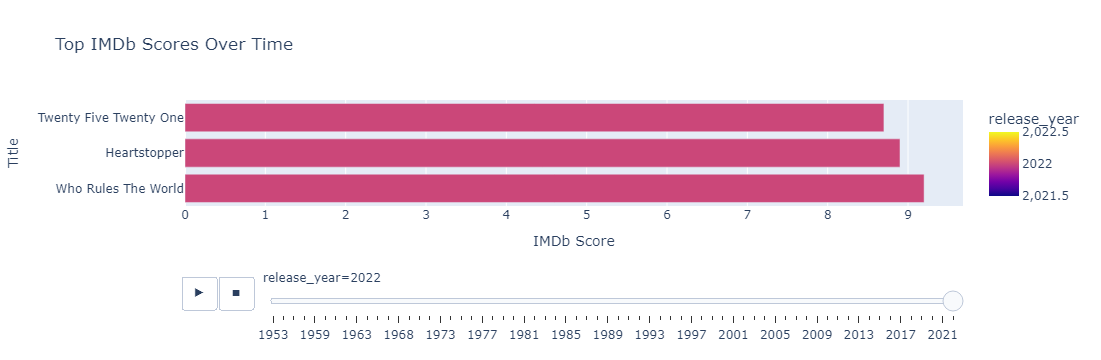

In [135]:
top_scores_per_year = df.groupby('release_year').apply(lambda x: x.nlargest(3, 'imdb_score')).reset_index(drop=True)

fig = px.bar(top_scores_per_year, x='imdb_score', y='title', color='release_year', 
             orientation='h', animation_frame='release_year', 
             title='Top IMDb Scores Over Time')
fig.update_layout(xaxis_title='IMDb Score', yaxis_title='Title')
fig.show()